In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('weather.csv')

In [3]:
df.shape

(25551, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DATE                               25551 non-null  object 
 1   PRCP(liquid or ice rain from sky)  25548 non-null  float64
 2   TMAX                               25551 non-null  int64  
 3   TMIN                               25551 non-null  int64  
 4   RAIN                               25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
df.head()

,DATE,PRCP(liquid or ice rain from sky),TMAX,TMIN,RAIN
0,1/1/1948,0.47,51,42,True
1,1/2/1948,0.59,45,36,True
2,1/3/1948,0.42,45,35,True
3,1/4/1948,0.31,45,34,True
4,1/5/1948,0.17,45,32,True


In [6]:
df.isnull().sum().sort_values(ascending=False)

RAIN                                 3
PRCP(liquid or ice rain from sky)    3
TMIN                                 0
TMAX                                 0
DATE                                 0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop(['DATE'],axis=1,inplace=True)

In [9]:
df.describe()

,PRCP(liquid or ice rain from sky),TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002694515B2C8>,
      dtype=object)

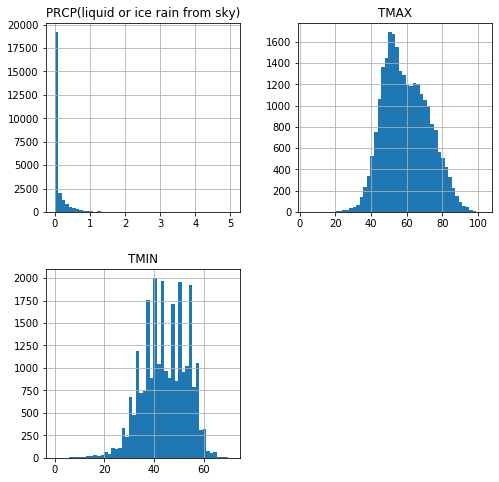

In [10]:
df.hist(bins=50,figsize=(8,8))

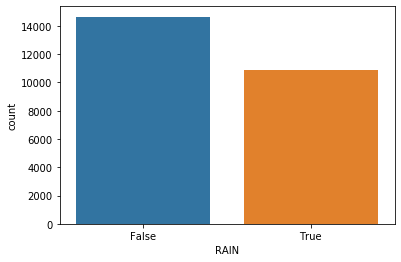

In [11]:
sns.countplot(df['RAIN'])

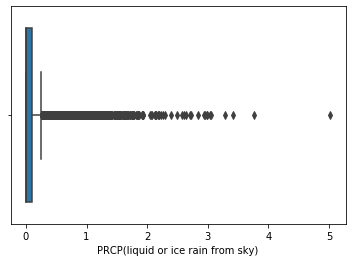

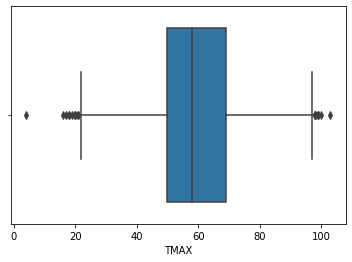

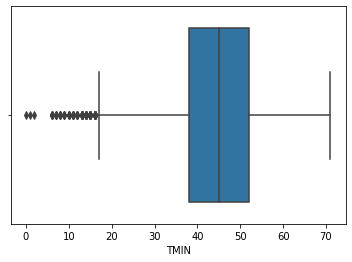

In [12]:
for i in df.iloc[:,:-1]:
    plt.figure()
    sns.boxplot(df[i])

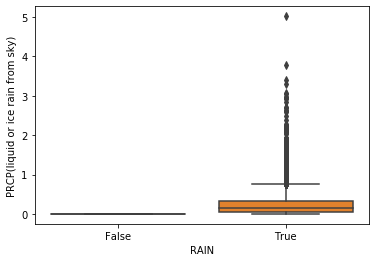

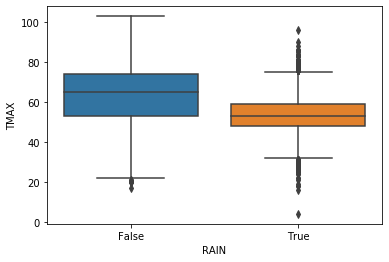

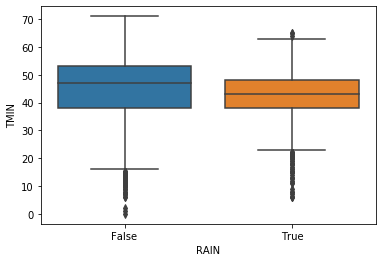

In [13]:
for i in df.iloc[:,:-1]:
    plt.figure()
    sns.boxplot(x=df.iloc[:,-1],y=df[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026945FDD648>,
      dtype=object)

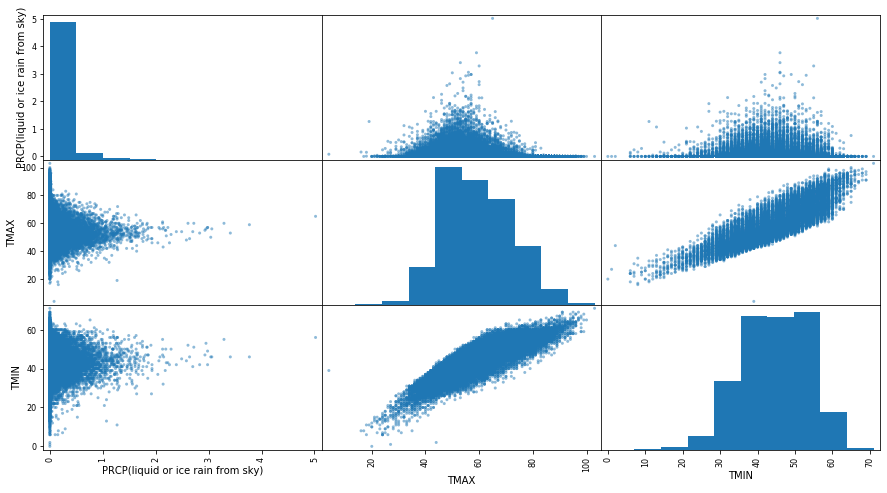

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,8))

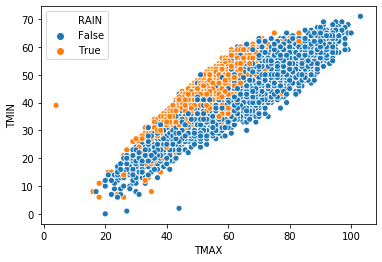

In [15]:
sns.scatterplot(x=df['TMAX'],y=df['TMIN'],hue=df.iloc[:,-1])

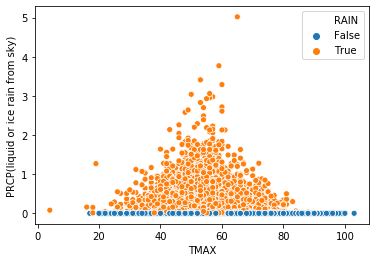

In [16]:
sns.scatterplot(x=df['TMAX'],y=df['PRCP(liquid or ice rain from sky)'],hue=df.iloc[:,-1])

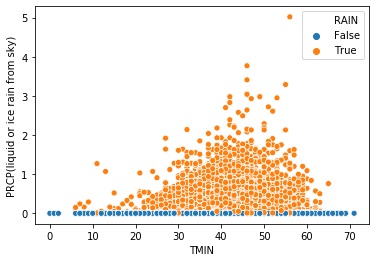

In [17]:
sns.scatterplot(x=df['TMIN'],y=df['PRCP(liquid or ice rain from sky)'],hue=df.iloc[:,-1])

In [18]:
from scipy import stats
z=np.abs(stats.zscore(df.iloc[:,:-1]))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([   46,    55,    80,   147,   148,   162,   269,   271,   318,
         343,   358,   368,   374,   375,   376,   388,   389,   390,
         393,   406,   412,   417,   665,   681,   695,   718,   722,
         726,   732,   733,   734,   736,   743,   743,   743,   744,
         744,   745,   745,   746,   747,   748,   749,   750,   754,
         755,   756,   758,   759,   760,   761,   761,   762,   763,
         764,   784,   792,   793,   805,   806,   807,   957,   997,
        1007,  1013,  1054,  1057,  1064,  1094,  1097,  1116,  1123,
        1124,  1125,  1134,  1135,  1152,  1367,  1383,  1419,  1460,
        1461,  1463,  1490,  1793,  1828,  1837,  1844,  1848,  1909,
        2099,  2108,  2151,  2165,  2179,  2196,  2211,  2212,  2234,
        2258,  2372,  2512,  2513,  2520,  2537,  2594,  2619,  2620,
        2837,  2838,  2853,  2854,  2862,  2871,  2872,  2872,  2873,
        2874,  2875,  2878,  2886,  2901,  2910,  2911,  2912,  2923,
        2924,  2925

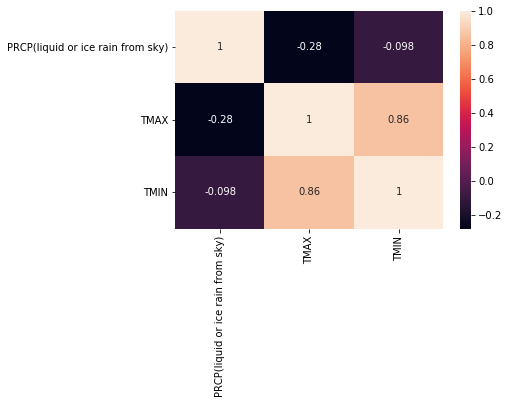

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
df.iloc[:,-1]=LabelEncoder().fit_transform(df.iloc[:,-1])

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=42,shuffle=True)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [23]:
model=Sequential()
model.add(Dense(5,input_dim=3,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=15,batch_size=10,validation_split=0.2)

Train on 15914 samples, validate on 3979 samples
Epoch 1/15
15914/15914 [==============================] - 16s 985us/step - loss: 0.3102 - accuracy: 0.8546 - val_loss: 0.2887 - val_accuracy: 0.8570
Epoch 2/15
15914/15914 [==============================] - 13s 827us/step - loss: 0.2854 - accuracy: 0.8685 - val_loss: 0.2220 - val_accuracy: 0.9231
Epoch 3/15
15914/15914 [==============================] - 12s 730us/step - loss: 0.2581 - accuracy: 0.8824 - val_loss: 0.1539 - val_accuracy: 0.9535
Epoch 4/15
15914/15914 [==============================] - 13s 825us/step - loss: 0.2280 - accuracy: 0.9068 - val_loss: 0.1986 - val_accuracy: 0.9279
Epoch 5/15
15914/15914 [==============================] - 12s 751us/step - loss: 0.2158 - accuracy: 0.9101 - val_loss: 0.1369 - val_accuracy: 0.9590
Epoch 6/15
15914/15914 [==============================] - 14s 858us/step - loss: 0.2004 - accuracy: 0.9171 - val_loss: 0.1553 - val_accuracy: 0.9530
Epoch 7/15
15914/15914 [==============================] -

In [36]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

TypeError: 'History' object is not subscriptable

In [37]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

TypeError: 'History' object is not subscriptable

In [33]:
y_predict=model.predict_classes(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_predict,np.array(Y_test)))
confusion_matrix(y_predict,np.array(Y_test))

0.9674306393244874


array([[2759,    0],
       [ 162, 2053]], dtype=int64)

In [1]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
auc = metrics.roc_auc_score(y_test, y_pred_predict)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

NameError: name 'y_test' is not defined